For lab 3 we will be building on the code from lab 2.

Now I will be doing this in SK and then also in torch.

Below is the final sk code from lab 2.

In [82]:
def perceptron_train (X, y, w, b, epochs, alpha ) :
    for epoch in range(epochs) :
        for xi, yi in zip(X, y) :
            xi = xi.reshape (1, X.shape[1])
            yi_hat =(np.matmul(xi, w)+b >0).astype(int)
            w += alpha * (yi - yi_hat) * xi.T
            b += alpha * (yi - yi_hat)[0][0]
    return w ,b

C:\Users\joshp\PycharmProjects\EE32009_SNN\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


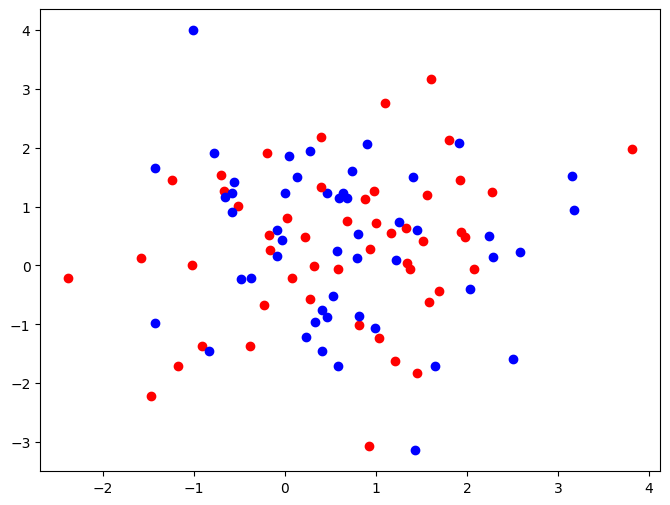

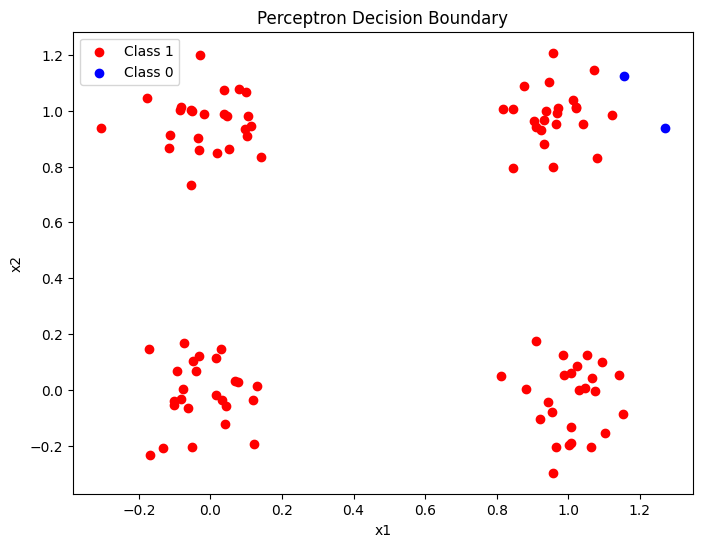

In [83]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0 ,0],[0 ,1],[1 ,0],[1 ,1]])
y = np.array([[1],[0],[0],[1]])

X = np.repeat(X, 25, axis=0)
y = np.repeat(y, 25, axis=0)

# noise injection
X = X + 1*np.random.randn(*X.shape)

# Some training data...
X_test = np.array([[0 ,0],[0 ,1],[1 ,0],[1 ,1]])
y_test = np.array([[1],[0],[0],[1]])
X_test = np.repeat(X_test, 25, axis =0)
X_test = X_test + (0.1 * np.random.randn(*X_test.shape))
y_test = np.repeat(y_test, 25, axis =0)

w = np.array([[1.] ,[1.]])
b = -1

#TRAINING!!!
w, b = perceptron_train(X, y, w, b, epochs=1, alpha=0.045)

# Perceptron output
y_hat =( np . matmul (X , w ) +b >0) . astype (int)


# Plotting
plt.figure(figsize =(8,6))
flag_label = [0,0]
for i in range (y.shape[0]) :
    if y[i]==0:
        if flag_label[0]==0:
            flag_label[0]=1
            plt.scatter(X[i,0], X[i,1] ,color ='blue', label='Class 0')
        else:
            plt.scatter(X[i,0], X[i,1], color='blue')
    else:
        if flag_label[1]==0:
            flag_label[1]=1
            plt.scatter(X[i,0], X[i,1], color='red', label='Class 1')
        else:
            plt.scatter(X[i,0], X[i,1], color='red')

# Instantiate an MPLClassifier from sk-learn
# Create a neural network with no hidden layer , 2 inputs , 1 output
clf = MLPClassifier(hidden_layer_sizes=(),
                    activation ='logistic', # Use built -in sigmoid activation
                    solver='sgd',
                    learning_rate_init=0.1,
                    max_iter=1000)

clf.fit(X, y)
y_hat = clf.predict(X_test)


# Plotting
plt.figure(figsize =(8,6))
flag_label = [0,0]
for i in range (y.shape[0]) :
    if y_hat[i]==0:
        if flag_label[0]==0:
            flag_label[0]=1
            plt.scatter(X_test[i,0], X_test[i,1] ,color ='blue', label='Class 0')
        else:
            plt.scatter(X_test[i,0], X_test[i,1], color='blue')
    else:
        if flag_label[1]==0:
            flag_label[1]=1
            plt.scatter(X_test[i,0], X_test[i,1], color='red', label='Class 1')
        else:
            plt.scatter(X_test[i,0], X_test[i,1], color='red')

plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Boundary')
plt.show()


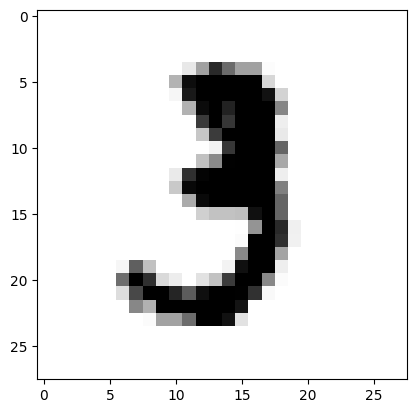

In [84]:
# Import numpy for arrays and matplotlib for drawing the numbers
import numpy
import matplotlib.pyplot as plt
# Open the 100 training samples in read mode
data_file = open('MNIST/mnist_train_100.csv', 'r')
# Read all of the lines from the file into memory
data_list = data_file.readlines()
# Close the file (we are done with it)
data_file.close()
# Take the first line (data_list index 0, the first sample), and split it up based on the commas
# all_values now contains a list of [label, pixel 1, pixel 2, pixel 3, ..., pixel 784]
all_values = data_list[10].split(',')
# Take the long list of pixels (but not the label), and reshape them to a 2D array of pixels
image_array = numpy.array(all_values[1:], dtype=numpy.float64).reshape((28, 28))
# Plot this 2D array as an image, use the grey colour map and don’t interpolate
plt.imshow(image_array, cmap='Greys', interpolation='None')
plt.show()


In [85]:
import numpy as np
from sklearn.neural_network import MLPClassifier

training_data_file = open("MNIST/mnist_train_100.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

output_nodes = 10
X = np.empty((0, 784)) # 784 pixels total
y = np.empty((0, 10)) # 10 classifications

for image in training_data_list:
    all_values = image.split(',')
    # scale and shift the inputs from 0 to 255 to 0.01 to 1
    inputs = (np.array(all_values[1:], dtype=numpy.float64) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99

    X = np.vstack((X, inputs))
    y = np.vstack((y, targets))
    pass

# nn with no hidden layers 2 inputs and 1 output
# this is lifted from lab 2
clf = MLPClassifier(hidden_layer_sizes=(),
                    activation ='logistic', # Use built -in sigmoid activation
                    solver='sgd',
                    learning_rate_init=0.3,
                    max_iter=1000)

y = np.argmax(y, axis=1)
clf.fit(X, y)


,hidden_layer_sizes,()
,activation,'logistic'
,solver,'sgd'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.3
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,None


Now we have got the training data through the model we should throw some test data at it i guess?...

Function to display test images - will be used to display incorrectly classified images!

In [86]:
def image_show(all_values):
    img_array = numpy.array(all_values[1:], dtype=numpy.float64).reshape((28, 28))
    plt.imshow(img_array, cmap='Greys', interpolation='None')
    plt.show()

correct lable:7 vs inference:7
correct lable:2 vs inference:2
correct lable:1 vs inference:1
correct lable:0 vs inference:0
correct lable:4 vs inference:4
correct lable:1 vs inference:1
correct lable:4 vs inference:9


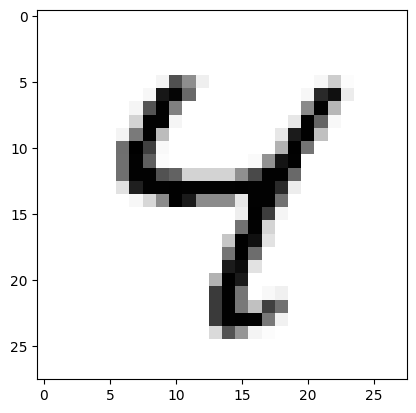

correct lable:9 vs inference:4


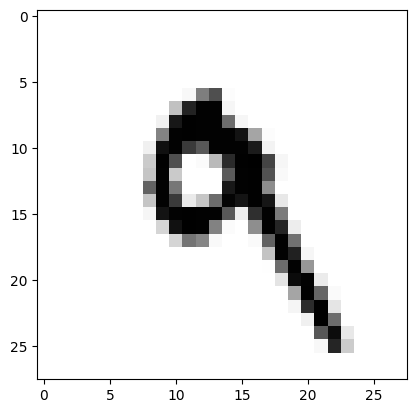

correct lable:5 vs inference:4


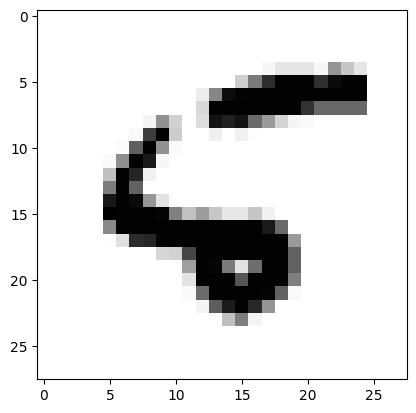

correct lable:9 vs inference:9
performance = 70.0%


In [87]:
test_data_file = open("MNIST/mnist_test_10.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

scorecard = []

for image in test_data_list:
    all_values = image.split(',')
    correct_label =int(all_values[0])
    inputs = (np.array(all_values[1:], dtype=numpy.float64) / 255.0 * 0.99) + 0.01
    outputs = clf.predict([inputs])
    label = list(outputs)[0]
    print(f"correct lable:{correct_label} vs inference:{label}")
    if label == correct_label :
        scorecard.append(1)
    else:
        image_show(all_values)
        scorecard.append(0)
    pass
pass

scorecard_array = np.array(scorecard)
print(f"performance = {scorecard_array.mean()*100}%")


Now we gonna try do this in torch bru...

In [88]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# lets make the image set into a tensor....

X_TENSOR = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).long()

# Wrap tensors into a dataset
dataset = TensorDataset(X_TENSOR, y_tensor)
# Make a DataLoader to iterate in mini-batches
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

print(X_TENSOR.size(), y_tensor.size())
print(X_TENSOR, y_tensor)

torch.Size([100, 784]) torch.Size([100])
tensor([[0.0100, 0.0100, 0.0100,  ..., 0.0100, 0.0100, 0.0100],
        [0.0100, 0.0100, 0.0100,  ..., 0.0100, 0.0100, 0.0100],
        [0.0100, 0.0100, 0.0100,  ..., 0.0100, 0.0100, 0.0100],
        ...,
        [0.0100, 0.0100, 0.0100,  ..., 0.0100, 0.0100, 0.0100],
        [0.0100, 0.0100, 0.0100,  ..., 0.0100, 0.0100, 0.0100],
        [0.0100, 0.0100, 0.0100,  ..., 0.0100, 0.0100, 0.0100]]) tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1])


In [89]:
class DigiClass(nn.Module):
    def __init__(self):
        super(DigiClass, self).__init__()

        # 784 input -> 128 hidden -> 10 output
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [90]:
model = DigiClass()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    for data, targets in train_loader:
        # fp
        logits = model(data)
        loss = criterion(logits, targets)

        # back propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

correct lable:7 vs inference:7
correct lable:2 vs inference:2
correct lable:1 vs inference:1
correct lable:0 vs inference:0
correct lable:4 vs inference:4
correct lable:1 vs inference:1
correct lable:4 vs inference:9


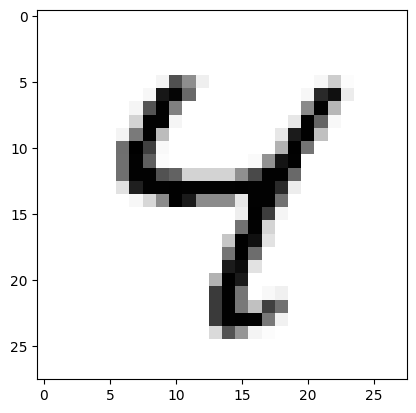

correct lable:9 vs inference:4


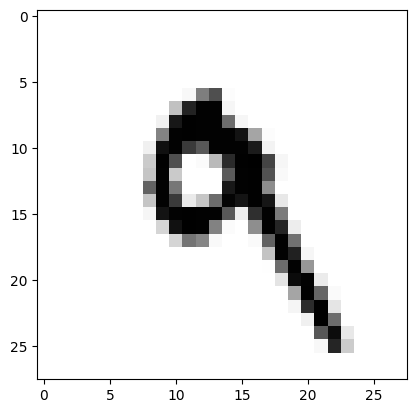

correct lable:5 vs inference:4


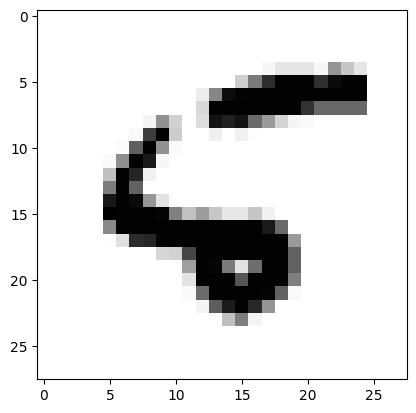

correct lable:9 vs inference:9
performance = 70.0%


In [91]:
model.eval()

scorecard = []

with torch.no_grad():
    for image in test_data_list:
        all_values = image.split(',')
        correct_label =int(all_values[0])
        inputs = (np.array(all_values[1:], dtype=numpy.float64) / 255.0 * 0.99) + 0.01
        outputs = model(torch.from_numpy(inputs).float())
        predicted = torch.argmax(outputs)
        print(f"correct lable:{correct_label} vs inference:{predicted}")
        if predicted == correct_label :
            scorecard.append(1)
        else:
            image_show(all_values)
            scorecard.append(0)

scorecard_array = np.array(scorecard)
print(f"performance = {scorecard_array.mean()*100}%")

To improve inference you can modify the hyper parameters. So lets fuck around with the layers together. This version has 784 -> 128 (hidden) -> 10...

In [92]:
class DigiClass(nn.Module):
    def __init__(self):
        super(DigiClass, self).__init__()

        # 784 input -> 256 hidden -> 64 hidden -> 10 output
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [93]:
model = DigiClass()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.06)

for epoch in range(100):
    for data, targets in train_loader:
        # fp
        logits = model(data)
        loss = criterion(logits, targets)

        # back propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

correct lable:7 vs inference:9


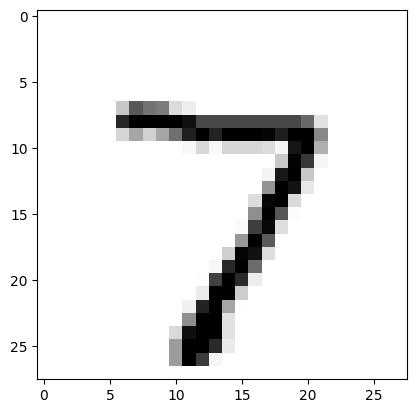

correct lable:2 vs inference:2
correct lable:1 vs inference:1
correct lable:0 vs inference:0
correct lable:4 vs inference:7


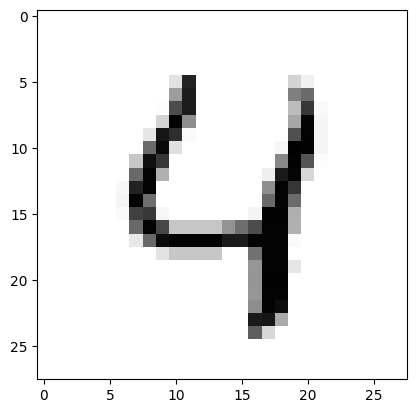

correct lable:1 vs inference:1
correct lable:4 vs inference:9


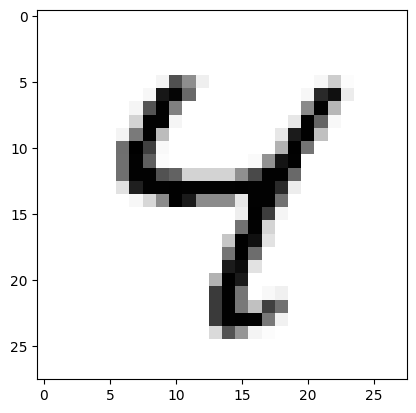

correct lable:9 vs inference:6


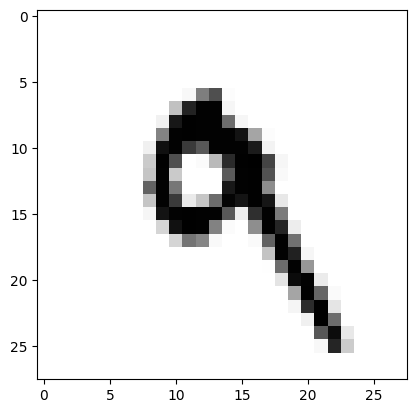

correct lable:5 vs inference:6


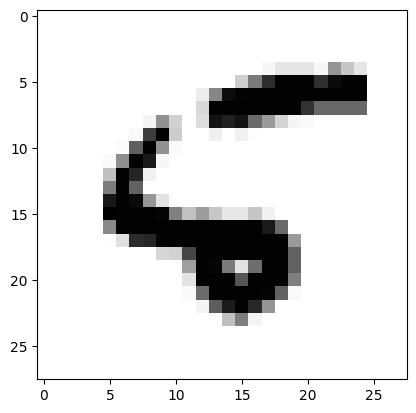

correct lable:9 vs inference:7


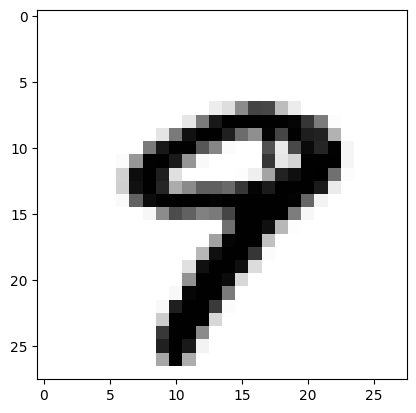

performance = 40.0%


In [94]:
model.eval()

scorecard = []

with torch.no_grad():
    for image in test_data_list:
        all_values = image.split(',')
        correct_label =int(all_values[0])
        inputs = (np.array(all_values[1:], dtype=numpy.float64) / 255.0 * 0.99) + 0.01
        outputs = model(torch.from_numpy(inputs).float())
        predicted = torch.argmax(outputs)
        print(f"correct lable:{correct_label} vs inference:{predicted}")
        if predicted == correct_label :
            scorecard.append(1)
        else:
            image_show(all_values)
            scorecard.append(0)

scorecard_array = np.array(scorecard)
print(f"performance = {scorecard_array.mean()*100}%")

As you can see its pretty hard to make it better like this...

Its likey that a convolutional nn would be better I think, lemme show you...

Why will a CNN be better?

Basically cnns slide filters over the image that can detect patterns much better than a fully connected (dense) network like we had before.


In [95]:
# this model requires images in a [1, 28, 28] format

class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()

        # Convolution layers

        # take the greyscale of that pixel and create 16 features from it
        # kernel_size = 3 basically means we look for at 3x3 pixels at a time
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        # take the output 16 features from the prev layer and extract 32
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)

        # Pooling layer
        # Reduces spatial size by 2x
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(32 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)

        # Dropout for regularization
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [96]:
# get that data ready baby
X_TENSOR = torch.from_numpy(X).float().view(-1, 1, 28, 28)
# Wrap tensors into a dataset

dataset = TensorDataset(X_TENSOR, y_tensor)
# Make a DataLoader to iterate in mini-batches
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [97]:
# Train the mf

model = CNNClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

losses = []

for epoch in range(100):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{100}], Loss: {epoch_loss:.4f}")

Epoch [1/100], Loss: 2.7328
Epoch [2/100], Loss: 2.1124
Epoch [3/100], Loss: 1.6911
Epoch [4/100], Loss: 1.0734
Epoch [5/100], Loss: 0.6524
Epoch [6/100], Loss: 0.3817
Epoch [7/100], Loss: 0.3117
Epoch [8/100], Loss: 0.0997
Epoch [9/100], Loss: 0.1387
Epoch [10/100], Loss: 0.0798
Epoch [11/100], Loss: 0.0374
Epoch [12/100], Loss: 0.0795
Epoch [13/100], Loss: 0.0263
Epoch [14/100], Loss: 0.0428
Epoch [15/100], Loss: 0.0112
Epoch [16/100], Loss: 0.0160
Epoch [17/100], Loss: 0.0543
Epoch [18/100], Loss: 0.0051
Epoch [19/100], Loss: 0.0149
Epoch [20/100], Loss: 0.0004
Epoch [21/100], Loss: 0.0072
Epoch [22/100], Loss: 0.0201
Epoch [23/100], Loss: 0.0013
Epoch [24/100], Loss: 0.0033
Epoch [25/100], Loss: 0.0318
Epoch [26/100], Loss: 0.0007
Epoch [27/100], Loss: 0.0129
Epoch [28/100], Loss: 0.0026
Epoch [29/100], Loss: 0.0662
Epoch [30/100], Loss: 0.0381
Epoch [31/100], Loss: 0.0400
Epoch [32/100], Loss: 0.0033
Epoch [33/100], Loss: 0.0021
Epoch [34/100], Loss: 0.0153
Epoch [35/100], Loss: 0

correct lable:7 vs inference:7
correct lable:2 vs inference:2
correct lable:1 vs inference:1
correct lable:0 vs inference:0
correct lable:4 vs inference:4
correct lable:1 vs inference:1
correct lable:4 vs inference:9


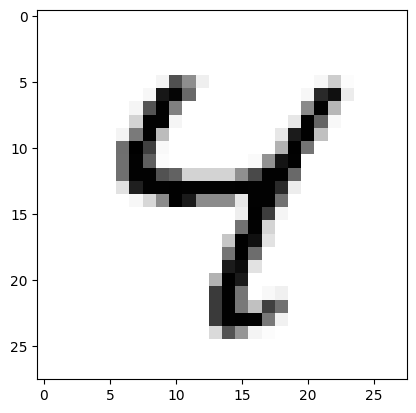

correct lable:9 vs inference:4


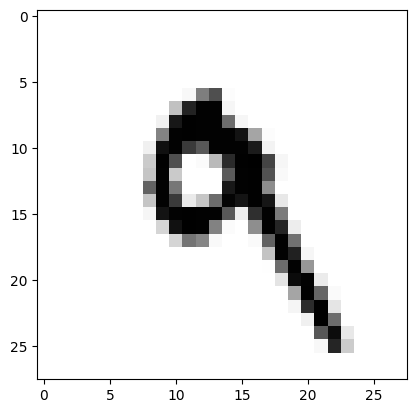

correct lable:5 vs inference:4


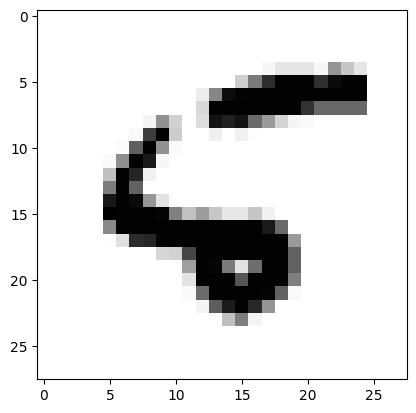

correct lable:9 vs inference:9
performance = 70.0%


In [98]:
model.eval()

scorecard = []

with torch.no_grad():
    for image in test_data_list:
        all_values = image.split(',')
        correct_label =int(all_values[0])
        inputs = (np.array(all_values[1:], dtype=numpy.float64) / 255.0 * 0.99) + 0.01
        outputs = model(torch.from_numpy(inputs).float().view(-1, 1, 28, 28))
        predicted = torch.argmax(outputs)
        print(f"correct lable:{correct_label} vs inference:{predicted}")
        if predicted == correct_label :
            scorecard.append(1)
        else:
            image_show(all_values)
            scorecard.append(0)

scorecard_array = np.array(scorecard)
print(f"performance = {scorecard_array.mean()*100}%")

Okay I know the result is the same but this is better trust...

The training set is just wayyyy to small!

Let use 5,000 images from the set!

In [110]:
training_data_file = open("MNIST/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

output_nodes = 10
X = np.empty((0, 784)) # 784 pixels total
y = np.empty((0, 10)) # 10 classifications

for image_num, image in enumerate(training_data_list):
    if image_num >= 5000:
        break  # stop after 5000 iterations
    all_values = training_data_list[image_num].split(',')
    # scale and shift the inputs from 0 to 255 to 0.01 to 1
    inputs = (np.array(all_values[1:], dtype=numpy.float64) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99

    X = np.vstack((X, inputs))
    y = np.vstack((y, targets))
    pass
y = np.argmax(y, axis=1)


In [111]:
# get that data ready baby
X_TENSOR = torch.from_numpy(X).float().view(-1, 1, 28, 28)
y_tensor = torch.from_numpy(y).long()
# Wrap tensors into a dataset
dataset = TensorDataset(X_TENSOR, y_tensor)
# Make a DataLoader to iterate in mini-batches
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [114]:
# Train the mf

model = CNNClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

losses = []

for epoch in range(10):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{10}], Loss: {epoch_loss:.10f}")

Epoch [1/10], Loss: 0.8959475204
Epoch [2/10], Loss: 0.2514846426
Epoch [3/10], Loss: 0.1791234465
Epoch [4/10], Loss: 0.1622844125
Epoch [5/10], Loss: 0.1229467126
Epoch [6/10], Loss: 0.1076450083
Epoch [7/10], Loss: 0.0815223667
Epoch [8/10], Loss: 0.0807181546
Epoch [9/10], Loss: 0.0774170912
Epoch [10/10], Loss: 0.0693998967


In [115]:
model.eval()

scorecard = []

with torch.no_grad():
    for image in test_data_list:
        all_values = image.split(',')
        correct_label =int(all_values[0])
        inputs = (np.array(all_values[1:], dtype=numpy.float64) / 255.0 * 0.99) + 0.01
        outputs = model(torch.from_numpy(inputs).float().view(-1, 1, 28, 28))
        predicted = torch.argmax(outputs)
        print(f"correct lable:{correct_label} vs inference:{predicted}")
        if predicted == correct_label :
            scorecard.append(1)
        else:
            image_show(all_values)
            scorecard.append(0)

scorecard_array = np.array(scorecard)
print(f"performance = {scorecard_array.mean()*100}%")

correct lable:7 vs inference:7
correct lable:2 vs inference:2
correct lable:1 vs inference:1
correct lable:0 vs inference:0
correct lable:4 vs inference:4
correct lable:1 vs inference:1
correct lable:4 vs inference:4
correct lable:9 vs inference:9
correct lable:5 vs inference:5
correct lable:9 vs inference:9
performance = 100.0%


BOOM!